In [1]:
# reload magics
%load_ext autoreload
%autoreload 2

In [2]:
import colorcet as cc
import logging
import matplotlib.colors as mc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
import datasets
import json


# create a palette dictionary that has the same keys as the original palette
palette = cc.glasbey_hv
palette_dict = {i: mc.to_hex(palette[i]) for i in range(len(palette))} # type: ignore

# add an entry for -1
palette_dict[-1] = '#ffffff'

# set default colour for seaborn heatmaps
sns.set_theme(style = "whitegrid", rc={'figure.figsize':(8,8)}, palette='viridis')

## LOAD DATA

In [3]:
ds = datasets.load_from_disk('../Data/DataV2/features.arrow')
df = datasets.arrow_dataset.Dataset.to_pandas(ds)

In [4]:
df

,sex,age,SITE,MED-Analgesics,MED-Anesthetics,MED-Antibacterials,MED-Anticonvulsants,MED-Antidepressants,MED-Antifungals,MED-Antimigraine-agents,...,CD-ventricular_tachycardia_or___3,CD-ventricular_tachycardia_or___4,CD-weight_kgs,SUBST-1,SUBST-2,SUBST-3,SUBST-4,SUBST-5,LC_STATUS,__index_level_0__
0,2.0,30.0,2,0,0,0,0,0,0,0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,LC_POS,0
1,1.0,33.0,2,0,0,0,0,0,0,0,...,0.0,0.0,79.00,0.0,0.0,NaN,0.0,0.0,LC_POS,1
2,2.0,36.0,2,0,0,0,0,0,0,0,...,0.0,0.0,55.00,0.0,0.0,NaN,0.0,0.0,LC_POS,2
3,2.0,50.0,2,0,0,0,0,0,0,0,...,0.0,0.0,67.00,1.0,0.0,NaN,0.0,0.0,LC_POS,3
4,1.0,40.0,2,0,0,0,0,0,0,0,...,0.0,0.0,136.00,0.0,0.0,NaN,0.0,0.0,LC_POS,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,1.0,48.0,3,0,0,0,0,0,0,0,...,0.0,0.0,93.38,0.0,0.0,1.0,0.0,0.0,LC_POS,5659
5660,2.0,42.0,3,0,0,0,0,0,0,0,...,0.0,0.0,125.79,0.0,0.0,0.0,0.0,0.0,LC_POS,5660
5661,1.0,23.0,3,0,0,0,0,0,0,0,...,0.0,0.0,71.24,0.0,0.0,1.0,1.0,0.0,LC_POS,5661
5662,1.0,71.0,3,0,0,0,0,0,0,0,...,0.0,0.0,136.53,0.0,0.0,0.0,0.0,0.0,LC_POS,5662


In [5]:
site_name_dict = {
                  1: 'LDN',
                  2: 'MTL',
                  3: 'SAN',
                  4: 'RIO',
                  5: 'LUS',
                  6:'CA',
                  7:'NA'
                }

In [6]:
def add_suffix_to_dict_keys(dictionary, suffix):
    new_dict = {}
    for key, value in dictionary.items():
        new_key = key + suffix
        new_dict[new_key] = value
    return new_dict

# Cleanup

In [7]:
df = df.drop(["SUBST-2", "SUBST-3", "SUBST-4"],axis=1)

In [8]:
cols = df.columns.to_list()

In [9]:
lMeds = [x for x in cols if 'MED-' in x]

In [10]:
lSYMPT = [x for x in cols if 'SYMPT-' in x]

In [11]:
lVAX = [x for x in cols if 'VAX-' in x]

In [12]:
lHHX = [x for x in cols if 'HHX-' in x and 'HHX-OTHER' not in x]

In [13]:
lHHXOther = [x for x in cols if  'HHX-OTHER' in x]

In [14]:
lLABS = [x for x in cols if  'LABS-' in x]

In [15]:
lCD = [x for x in cols if  'CD-' in x]

In [16]:
lSUBST = [x for x in cols if  'SUBST-' in x]

In [17]:
print(df.columns.to_list())

['sex', 'age', 'SITE', 'MED-Analgesics', 'MED-Anesthetics', 'MED-Antibacterials', 'MED-Anticonvulsants', 'MED-Antidepressants', 'MED-Antifungals', 'MED-Antimigraine-agents', 'MED-Antiparasitics', 'MED-Antiparkinson-agents', 'MED-Antipsychotics', 'MED-Antispasticity-agents', 'MED-Antivirals', 'MED-Blood-glucose-regulators', 'MED-Blood-products', 'MED-Cardiovascular-agents', 'MED-Dental-and-oral-agents', 'MED-Dermatological-agents', 'MED-Gastrointestinal-agents', 'MED-Hormonal-agents-(adrenal)', 'MED-Hormonal-agents-(sex-hormones)', 'MED-Hormonal-agents-(thyroid)', 'MED-Hormone-suppressant-(thyroid)', 'MED-Immunological-agents', 'MED-Inflammatory-bowel-disease-agents', 'MED-Metabolic-bone-disease-agents', 'MED-Ophthalmic-agents', 'MED-Respiratory-tract-agents', 'MED-Skeletal-muscle-relaxants', 'SYMPT-abdominal_pain___1', 'SYMPT-abdominal_pain___2', 'SYMPT-chest_pain___1', 'SYMPT-chest_pain___2', 'SYMPT-confusion_altered_mental_s___1', 'SYMPT-confusion_altered_mental_s___2', 'SYMPT-cough_

In [18]:
df = df.drop(lLABS,axis=1)

In [19]:
dfNA = df[df['SITE']<=3] # NORTH AMERICAN SITES - LDN, MTL, SAN

## Drop Cols based on greater than 10% missing

In [58]:
threshold = len(df) * 0.90  # 90% threshold
df.dropna(thresh=threshold, axis=1).dropna()


,sex,age,SITE,MED-Analgesics,MED-Anesthetics,MED-Antibacterials,MED-Anticonvulsants,MED-Antidepressants,MED-Antifungals,MED-Antimigraine-agents,...,HHX-OTHER-genetic-disorder,HHX-OTHER-hyper,HHX-OTHER-hypo,HHX-OTHER-resp,HHX-OTHER-sickle-cell-anemia,HHX-OTHER-surgery,HHX-OTHER-ulcerative-colitis,SUBST-1,SUBST-5,LC_STATUS
0,2.0,30.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,LC_POS
1,1.0,33.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,LC_POS
2,2.0,36.0,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.0,0.0,LC_POS
3,2.0,50.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,LC_POS
4,1.0,40.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,LC_POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,1.0,48.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,LC_POS
5660,2.0,42.0,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.0,0.0,LC_POS
5661,1.0,23.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,LC_POS
5662,1.0,71.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,LC_POS


# 1 - Only Complete Patients -- Cant do - no patients with complete data

In [59]:
df.dropna()

,sex,age,SITE,MED-Analgesics,MED-Anesthetics,MED-Antibacterials,MED-Anticonvulsants,MED-Antidepressants,MED-Antifungals,MED-Antimigraine-agents,...,CD-ventilatory_support_type___3,CD-ventilatory_support_type___4,CD-ventricular_tachycardia_or___1,CD-ventricular_tachycardia_or___2,CD-ventricular_tachycardia_or___3,CD-ventricular_tachycardia_or___4,CD-weight_kgs,SUBST-1,SUBST-5,LC_STATUS


# 2 - Drop columns based on treshold complete, keep patients with complete data

### Tmp - SAMPLE

In [20]:
threshold = len(df) * 0.90  # 90% threshold
df.dropna(thresh=threshold, axis=1).dropna()

,sex,age,SITE,MED-Analgesics,MED-Anesthetics,MED-Antibacterials,MED-Anticonvulsants,MED-Antidepressants,MED-Antifungals,MED-Antimigraine-agents,...,HHX-OTHER-hyper,HHX-OTHER-hypo,HHX-OTHER-resp,HHX-OTHER-sickle-cell-anemia,HHX-OTHER-surgery,HHX-OTHER-ulcerative-colitis,SUBST-1,SUBST-5,LC_STATUS,__index_level_0__
0,2.0,30.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,LC_POS,0
1,1.0,33.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,LC_POS,1
2,2.0,36.0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.0,0.0,LC_POS,2
3,2.0,50.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.0,0.0,LC_POS,3
4,1.0,40.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,LC_POS,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,1.0,48.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,LC_POS,5659
5660,2.0,42.0,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0.0,0.0,LC_POS,5660
5661,1.0,23.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,LC_POS,5661
5662,1.0,71.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,LC_POS,5662


## Check all column thresholds for ALL Sites

### Calculate DfThres

In [21]:
lThres = []
lLastCols = df.columns.to_list()
for i in range(0, 101, 1):
    threshold = len(df) * (i / 100)
    dfTmp = df.dropna(thresh=threshold, axis=1).dropna()

    dThres = {
        "threshold": i,
        "nCols": len(dfTmp.columns),
        "nPatients": len(dfTmp),
        'colDropped': ','.join(list(set(lLastCols).difference(set(dfTmp.columns.to_list())))),
        'cols': ','.join(dfTmp.columns.to_list())
    }
    lLastCols=dfTmp.columns.to_list()
    dThres.update(dfTmp["LC_STATUS"].value_counts().to_dict())
    dThres.update(
        add_suffix_to_dict_keys(
            (
                dfTmp["LC_STATUS"].value_counts()
                / df["LC_STATUS"].value_counts()
                * 100
            ).to_dict(),
            "_Perc",
        )
    ),
    dThres.update(
        (
            dfTmp["SITE"].replace(site_name_dict).value_counts(dropna=False)
            / df["SITE"].replace(site_name_dict).value_counts(dropna=False)
            * 100
        ).to_dict()
    )
    lThres.append(dThres)
dfThres = pd.DataFrame(lThres)

In [22]:
dfThres

,threshold,nCols,nPatients,colDropped,cols,HC_Perc,LC_NEG_Perc,LC_POS_Perc,LDN,LUS,MTL,RIO,SAN,LC_POS,LC_NEG,HC
0,0,390,0,,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,385,0,"CD-baby_covid,CD-outcome,CD-covid_test_result_...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,385,0,,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,384,0,CD-gcs,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,383,0,CD-covid_test_result_4,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,90,5396,,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,94.475794,96.297968,74.294671,95.092025,100.0,84.517766,100.0,2133.0,3181.0,82.0
97,97,76,5517,"HHX-Chronic lung disease,SYMPT-extremity_weakn...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,98.069498,96.297968,74.294671,95.092025,100.0,99.873096,100.0,2133.0,3302.0,82.0
98,98,76,5517,,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,98.069498,96.297968,74.294671,95.092025,100.0,99.873096,100.0,2133.0,3302.0,82.0
99,99,65,5526,"HHX-Chronic liver disease,HHX-Arterial Hyperte...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,98.099198,96.659142,77.115987,95.092025,100.0,99.873096,100.0,2141.0,3303.0,82.0


In [23]:
dfThres.to_csv("OUTPUT/MP/02-splicing/DataV2/2_1-thresholdsAll.csv", index=False)

### Plot

#### Threshold VS nCol and nPatients

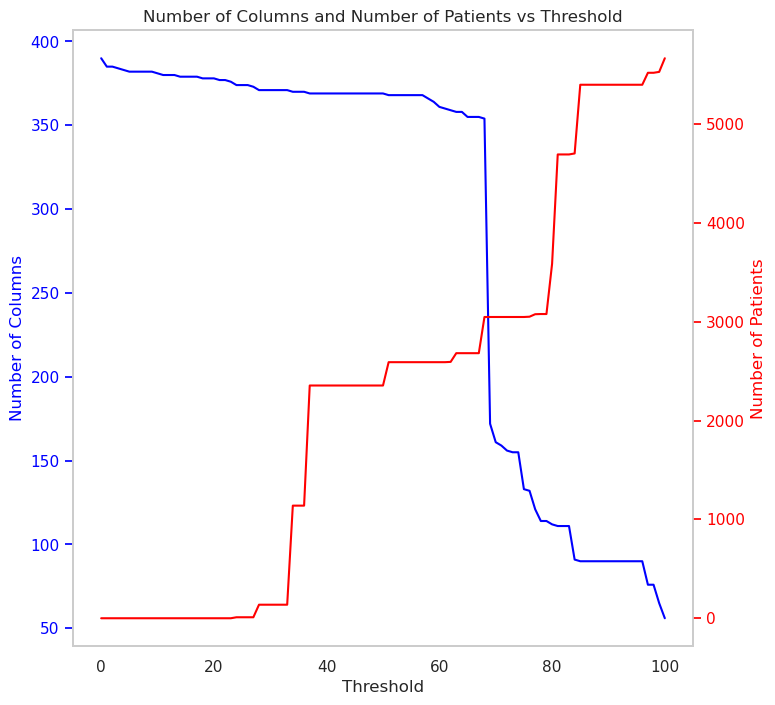

In [24]:
import matplotlib.pyplot as plt

# Extract the data for plotting
x = dfThres['threshold']
y1 = dfThres['nCols']
y2 = dfThres['nPatients']


# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first line plot
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Number of Columns', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second line plot
ax2.plot(x, y2, color='red')
ax2.set_ylabel('Number of Patients', color='red')
ax2.tick_params('y', colors='red')

ax1.grid(False)
ax2.grid(False)
# Add a title and legend
plt.title('Number of Columns and Number of Patients vs Threshold')
# plt.legend(['Number of Columns', 'Number of Patients'])

# Display the plot
plt.savefig('OUTPUT/MP/02-splicing/DataV2/2_1-thresholdsAll.png',dpi=600)
plt.show()

#### Threshold vs nCol and nPatients by LC group

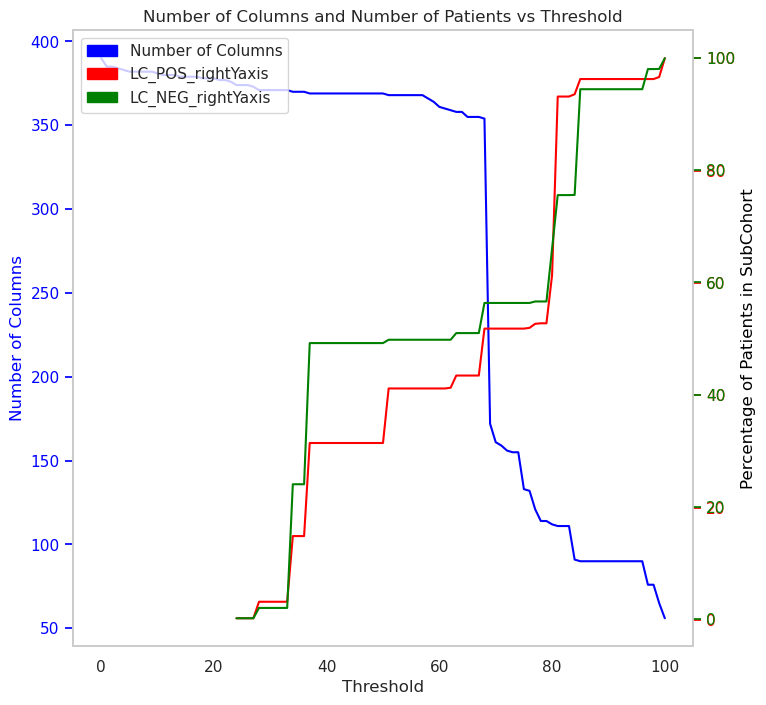

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Extract the data for plotting
x = dfThres['threshold']
y1 = dfThres['nCols']
y2 = dfThres['LC_POS_Perc']
y3 = dfThres['LC_NEG_Perc']

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first line plot
ax1.plot(x, y1, color='blue',label='num of col')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Number of Columns', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second line plot
ax2.plot(x, y2, color="red", label="LC_POS_rightYaxis")
ax2.set_ylabel('Percentage of Patients in SubCohort', color='black')
ax2.tick_params('y', colors='red')

# Create a third y-axis
ax3 = ax1.twinx()

# Plot the third line plot
ax3.plot(x, y3, color="green", label='LC_NEG_rightYaxis')
ax3.tick_params("y", colors="green")

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
# Add a title and legend
plt.title('Number of Columns and Number of Patients vs Threshold')

# Create a custom legend
blue_patch = mpatches.Patch(color='blue', label='Number of Columns')
red_patch = mpatches.Patch(color='red', label='LC_POS_rightYaxis')
green_patch = mpatches.Patch(color='green', label='LC_NEG_rightYaxis')
plt.legend(handles=[blue_patch, red_patch, green_patch])

# Display the plot
plt.savefig("OUTPUT/MP/02-splicing/DataV2/2_1-thresholdsAll_subcohort.png", dpi=600)
plt.show()

#### Threshold VS patient site percentage

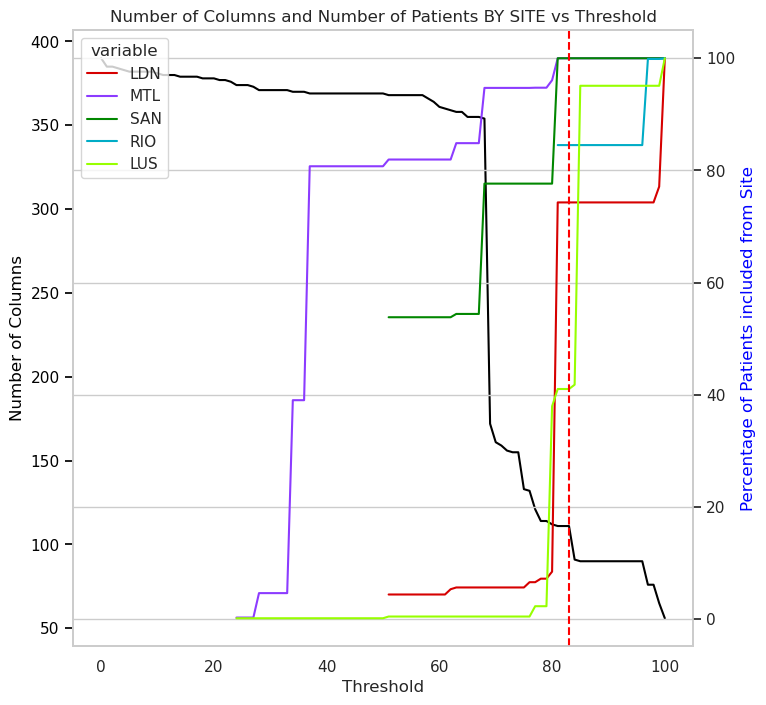

In [26]:
# Extract the data for plotting
x = dfThres["threshold"]
y1 = dfThres["nCols"]

lColSel = ["threshold", "LDN", "MTL", "SAN", "RIO", "LUS"]
palette = sns.color_palette(cc.glasbey, n_colors=5)
dfTmp = deepcopy(dfThres[lColSel])

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first line plot
ax1.plot(x, y1, color="black", label="num of col")
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Number of Columns", color="black")
ax1.tick_params("y", colors="black")
ax1.grid(False)

# Create a second y-axis and Plot the second line plot
ax2 = ax1.twinx()
sns.lineplot(
    x="threshold",
    y="value",
    hue="variable",
    data=pd.melt(dfTmp, ["threshold"]),
    palette=palette,
)

plt.axvline(x=83, color="r", linestyle="--")

# Add a title and legend
plt.title("Number of Columns and Number of Patients BY SITE vs Threshold")
ax2.set_ylabel("Percentage of Patients included from Site", color="blue")


# plt.legend(handles=[blue_patch, red_patch, green_patch])

# Display the plot
plt.savefig("OUTPUT/MP/02-splicing/DataV2/2_1-thresholdsAll_sitePerc.png", dpi=600)
plt.show()

## Check all column thresholds for NORTH AMERICAN Sites

### Calculate DfThres

In [27]:
lThresNA = []
lLastCols = df.columns.to_list()
for i in range(0,101,1):
    threshold = len(dfNA)* (i/100)
    dfTmp = dfNA.dropna(thresh=threshold, axis=1).dropna()

    dThres = {
        "threshold": i,
        "nCols": len(dfTmp.columns),
        "nPatients": len(dfTmp),
        "colDroppedFromPrev": ",".join(
            list(set(lLastCols).difference(set(dfTmp.columns.to_list())))
        ),
        "cols": ",".join(dfTmp.columns.to_list()),
    }
    dThres.update(dfTmp["LC_STATUS"].value_counts().to_dict())
    dThres.update(
        add_suffix_to_dict_keys((dfTmp["LC_STATUS"].value_counts() / dfNA["LC_STATUS"].value_counts() * 100).to_dict(), '_Perc')
    )
    dThres.update(
        (
            dfTmp["SITE"].replace(site_name_dict).value_counts(dropna=False)
            / dfNA["SITE"].replace(site_name_dict).value_counts(dropna=False)
            * 100
        ).to_dict()
    )
    lThresNA.append(dThres)
dfThresNA = pd.DataFrame(lThresNA)

In [28]:
dfThresNA

,threshold,nCols,nPatients,colDroppedFromPrev,cols,HC_Perc,LC_NEG_Perc,LC_POS_Perc,LDN,MTL,SAN,LC_POS,LC_NEG,HC
0,0,390,0,,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,384,0,"CD-baby_covid,CD-covid_test_result_5,CD-outcom...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,384,0,"CD-baby_covid,CD-covid_test_result_5,CD-outcom...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,383,0,"CD-o2_saturation,CD-baby_covid,CD-covid_test_r...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,383,0,"CD-o2_saturation,CD-baby_covid,CD-covid_test_r...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,145,3489,"CD-encephalitis___4,CD-gastrointestinal_compli...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,99.777283,93.962848,74.294671,99.965671,100.0,1214.0,2240.0,35.0
97,97,145,3489,"CD-encephalitis___4,CD-gastrointestinal_compli...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,99.777283,93.962848,74.294671,99.965671,100.0,1214.0,2240.0,35.0
98,98,74,3490,"CD-covid_test_result_5,CD-complications_of_the...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,99.777283,94.040248,74.294671,100.000000,100.0,1215.0,2240.0,35.0
99,99,64,3505,"CD-covid_test_result_5,CD-complications_of_the...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,99.821826,95.123839,78.996865,100.000000,100.0,1229.0,2241.0,35.0


In [29]:
dfThres.to_csv("OUTPUT/MP/02-splicing/DataV2/2_2-thresholdsNA.csv", index=False)

### Plot

#### Threshold VS nCol and nPatients

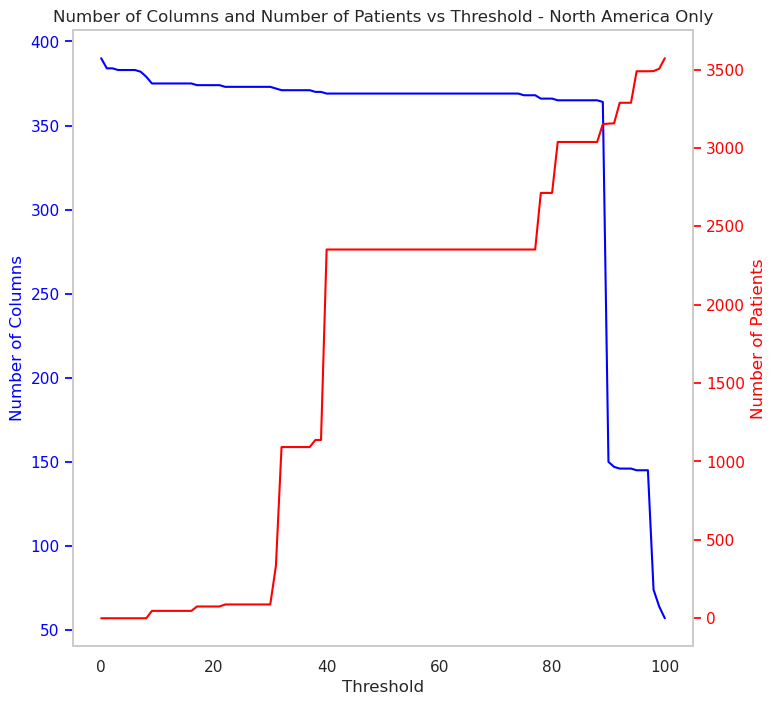

In [30]:
import matplotlib.pyplot as plt

# Extract the data for plotting
x = dfThresNA["threshold"]
y1 = dfThresNA["nCols"]
y2 = dfThresNA["nPatients"]


# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first line plot
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Number of Columns', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second line plot
ax2.plot(x, y2, color='red')
ax2.set_ylabel('Number of Patients', color='red')
ax2.tick_params('y', colors='red')


ax1.grid(False)
ax2.grid(False)
# Add a title and legend
plt.title('Number of Columns and Number of Patients vs Threshold - North America Only')
# plt.legend(['Number of Columns', 'Number of Patients'])

# Display the plot
plt.savefig("OUTPUT/MP/02-splicing/DataV2/2_2-thresholdsNA.png", dpi=600)
plt.show()

#### Threshold VS nCol and nPatients by LC group

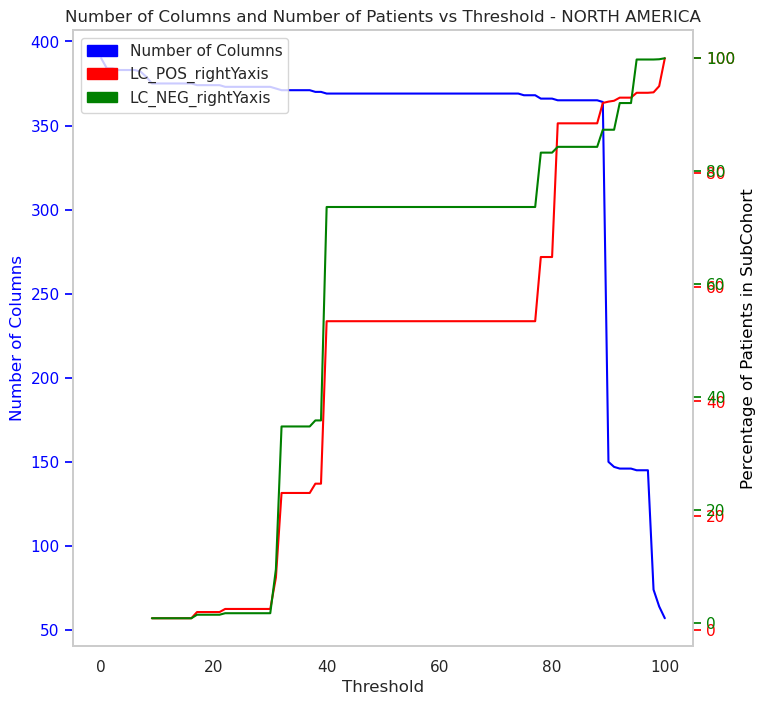

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Extract the data for plotting
x = dfThresNA["threshold"]
y1 = dfThresNA["nCols"]
y2 = dfThresNA["LC_POS_Perc"]
y3 = dfThresNA["LC_NEG_Perc"]

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first line plot
ax1.plot(x, y1, color="blue", label="num of col")
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Number of Columns", color="blue")
ax1.tick_params("y", colors="blue")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second line plot
ax2.plot(x, y2, color="red", label="LC_POS_rightYaxis")
ax2.set_ylabel("Percentage of Patients in SubCohort", color="black")
ax2.tick_params("y", colors="red")

# Create a third y-axis
ax3 = ax1.twinx()

# Plot the third line plot
ax3.plot(x, y3, color="green", label="LC_NEG_rightYaxis")
ax3.tick_params("y", colors="green")

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
# Add a title and legend
plt.title("Number of Columns and Number of Patients vs Threshold - NORTH AMERICA")

# Create a custom legend
blue_patch = mpatches.Patch(color="blue", label="Number of Columns")
red_patch = mpatches.Patch(color="red", label="LC_POS_rightYaxis")
green_patch = mpatches.Patch(color="green", label="LC_NEG_rightYaxis")
plt.legend(handles=[blue_patch, red_patch, green_patch])

# Display the plot
plt.savefig("OUTPUT/MP/02-splicing/DataV2/2_1-thresholdsNA_subcohort.png", dpi=600)
plt.show()

#### Threshold VS patient site percentage

/tmp/ipykernel_35937/2515151041.py:21: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(


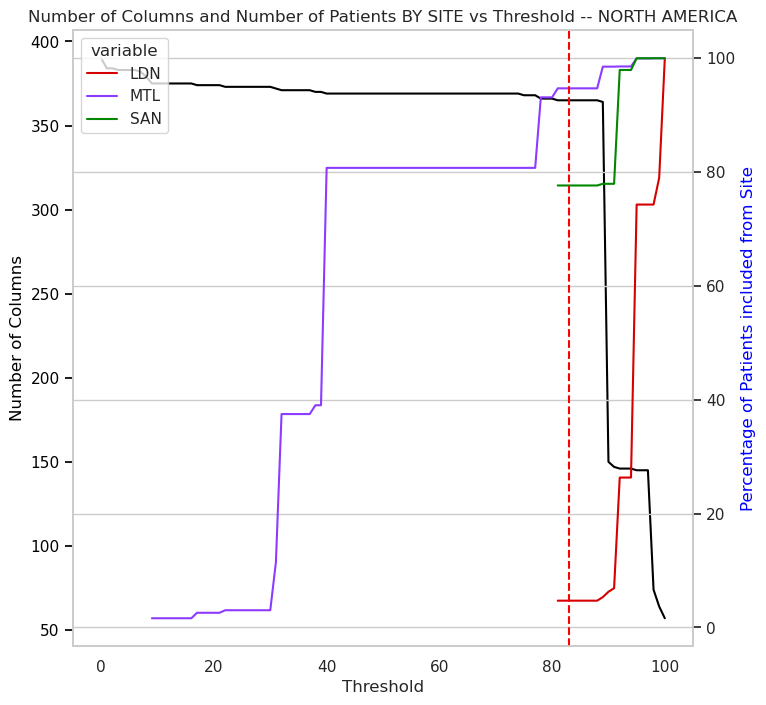

In [32]:
# Extract the data for plotting
x = dfThresNA["threshold"]
y1 = dfThresNA["nCols"]

lColSel = ["threshold", "LDN", "MTL", "SAN"]
palette = sns.color_palette(cc.glasbey, n_colors=5)
dfTmp = deepcopy(dfThresNA[lColSel])

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first line plot
ax1.plot(x, y1, color="black", label="num of col")
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Number of Columns", color="black")
ax1.tick_params("y", colors="black")
ax1.grid(False)

# Create a second y-axis and Plot the second line plot
ax2 = ax1.twinx()
sns.lineplot(
    x="threshold",
    y="value",
    hue="variable",
    data=pd.melt(dfTmp, ["threshold"]),
    palette=palette,
)

plt.axvline(x=83, color="r", linestyle="--")

# Add a title and legend
plt.title("Number of Columns and Number of Patients BY SITE vs Threshold -- NORTH AMERICA")
ax2.set_ylabel("Percentage of Patients included from Site", color="blue")


# plt.legend(handles=[blue_patch, red_patch, green_patch])

# Display the plot
plt.savefig("OUTPUT/MP/02-splicing/DataV2/2_2-thresholdsNA_sitePerc.png", dpi=600)
plt.show()

## Inspect Columns by Threshold to determine optimal Thresholds

In [33]:
# import data, only incld threshold that had some change from previous threshold
dfTAll = pd.read_csv("OUTPUT/MP/02-splicing/DataV2/2_1-thresholdsAll.csv").dropna(
    subset=["colDropped"]
)
dfTNA = pd.read_csv("OUTPUT/MP/02-splicing/DataV2/2_2-thresholdsNA.csv").dropna(
    subset=["colDropped"]
)

In [34]:
## -- RECOMMENDATION MP DONT USE--
# based on the following, Threshold 36% is recommended bc we we see the biggest jump in terms fo number of patients included
dfTAll[ (dfTAll['threshold']>30) & (dfTAll['threshold']<60)]

,threshold,nCols,nPatients,colDropped,cols,HC_Perc,LC_NEG_Perc,LC_POS_Perc,LDN,LUS,MTL,RIO,SAN,LC_POS,LC_NEG,HC
34,34,370,1139,CD-temperature,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,23.997624,14.943567,NaN,0.153374,39.031926,NaN,NaN,331.0,808.0,NaN
37,37,369,2354,CD-pregnant,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,49.183249,31.512415,NaN,0.153374,80.741504,NaN,NaN,698.0,1656.0,NaN
51,51,368,2590,CD-severity_level,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",1.219512,49.777250,41.218962,4.388715,0.460123,81.943014,NaN,53.823529,913.0,1676.0,1.0
58,58,366,2590,"CD-ventilatory_support_type___3,CD-ventilatory...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",1.219512,49.777250,41.218962,4.388715,0.460123,81.943014,NaN,53.823529,913.0,1676.0,1.0
59,59,364,2590,"CD-medication_received___2,CD-type_of_care___1","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",1.219512,49.777250,41.218962,4.388715,0.460123,81.943014,NaN,53.823529,913.0,1676.0,1.0


In [36]:
## -- RECOMMENDATION MP --
# based on the following, Threshold 81% or Threshold 85% is recommended bc we are able to retain a majority of patients from each site to ensure as many samples from each site are included in the analysis
# NOTE THE COL numbers include 'LC_STATUS', '__index_level_0__' and 'SITE'
##-- 81% threshold
# retains 111 columns
# retains 4691 patients
# reatins >50% of patients per site BUT LUC which is 41%

##-- 85% threshold
# retains 90 columns
# retains 5396 patients
# reatins >74% of patients per site 


dfTAll[ (dfTAll['threshold']>75) & (dfTAll['threshold']<101)]

,threshold,nCols,nPatients,colDropped,cols,HC_Perc,LC_NEG_Perc,LC_POS_Perc,LDN,LUS,MTL,RIO,SAN,LC_POS,LC_NEG,HC
76,76,132,3050,CD-covid_test_result_1,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",1.219512,56.340956,52.009029,6.583072,0.460123,94.713354,NaN,77.647059,1152.0,1897.0,1.0
77,77,121,3075,"HHX-Past tuberculosis infection,HHX-Heart fail...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",1.219512,56.608257,52.731377,6.583072,2.300613,94.747683,NaN,77.647059,1168.0,1906.0,1.0
78,78,114,3077,"CD-neurologic_complications___4,CD-respiratory...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",1.219512,56.608257,52.821670,7.210031,2.300613,94.747683,NaN,77.647059,1170.0,1906.0,1.0
80,80,112,3585,"VAX-vaccinated,HHX-HIV or AIDS","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",1.219512,66.052866,61.399549,8.463950,37.960123,96.086509,NaN,77.647059,1360.0,2224.0,1.0
81,81,111,4691,CD-mode_of_diag,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.000000,75.586576,93.182844,74.294671,41.027607,100.000000,84.517766,100.000000,2064.0,2545.0,82.0
84,84,91,4701,"SYMPT-fever_38_0oc___2,SYMPT-confusion_altered...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.000000,75.616276,93.589165,74.294671,41.794479,100.000000,84.517766,100.000000,2073.0,2546.0,82.0
85,85,90,5396,SYMPT-shortness_of_breath_dyspne___2,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.000000,94.475794,96.297968,74.294671,95.092025,100.000000,84.517766,100.000000,2133.0,3181.0,82.0
97,97,76,5517,"HHX-Chronic lung disease,SYMPT-extremity_weakn...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.000000,98.069498,96.297968,74.294671,95.092025,100.000000,99.873096,100.000000,2133.0,3302.0,82.0
99,99,65,5526,"HHX-Chronic liver disease,HHX-Arterial Hyperte...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.000000,98.099198,96.659142,77.115987,95.092025,100.000000,99.873096,100.000000,2141.0,3303.0,82.0
100,100,56,5664,"SYMPT-chest_pain___1,SYMPT-muscle_aches_myalgi...","SITE,MED-Analgesics,MED-Anesthetics,MED-Antiba...",100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2215.0,3367.0,82.0


In [37]:
df.columns

Index(['sex', 'age', 'SITE', 'MED-Analgesics', 'MED-Anesthetics',
       'MED-Antibacterials', 'MED-Anticonvulsants', 'MED-Antidepressants',
       'MED-Antifungals', 'MED-Antimigraine-agents',
       ...
       'CD-ventilatory_support_type___4', 'CD-ventricular_tachycardia_or___1',
       'CD-ventricular_tachycardia_or___2',
       'CD-ventricular_tachycardia_or___3',
       'CD-ventricular_tachycardia_or___4', 'CD-weight_kgs', 'SUBST-1',
       'SUBST-5', 'LC_STATUS', '__index_level_0__'],
      dtype='object', length=390)

In [38]:
## -- RECOMMENDATION MP -- 
# based on the following, Threshold 81 is also a good choice because it allows us to retain a decent chunk of the patients (w drop in LUS patients)
# but keep some more columns than 85
dfTAll[ (dfTAll['threshold']==81) | (dfTAll['threshold']==85)]

,threshold,nCols,nPatients,colDropped,cols,HC_Perc,LC_NEG_Perc,LC_POS_Perc,LDN,LUS,MTL,RIO,SAN,LC_POS,LC_NEG,HC
81,81,111,4691,CD-mode_of_diag,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,75.586576,93.182844,74.294671,41.027607,100.0,84.517766,100.0,2064.0,2545.0,82.0
85,85,90,5396,SYMPT-shortness_of_breath_dyspne___2,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,94.475794,96.297968,74.294671,95.092025,100.0,84.517766,100.0,2133.0,3181.0,82.0


## Export Selected Columns

In [39]:
s = dfTAll[dfTAll["threshold"] == 85]["colDropped"].iloc[0].split(",") + dfTAll[dfTAll["threshold"] == 84]["colDropped"].iloc[0].split(",")

file_path = "OUTPUT/MP/02-splicing/DataV2/2_1_DV2_colsThresAll_DroppedFrom81to85.json"

with open(file_path, "w") as json_file:
    json.dump(s, json_file)

In [40]:
# Export Selected 85 Threshold Columns to File

cols85 = dfTAll[dfTAll["threshold"] == 85]["cols"].iloc[0].split(",")
file_path = "OUTPUT/MP/02-splicing/DataV2/2_1_DV2_colsThresAll_85.json"

with open(file_path, "w") as json_file:
    json.dump(cols85, json_file)

In [41]:
# Export Selected 84 Threshold Columns to File

cols81 = dfTAll[dfTAll["threshold"] == 81]["cols"].iloc[0].split(",")
file_path = "OUTPUT/MP/02-splicing/DataV2/2_1_DV2_colsThresAll_81.json"

with open(file_path, "w") as json_file:
    json.dump(cols81, json_file)

In [42]:
# Export dataFrame based on Threshold 84

# using the arrow dataset format is way faster than excel
# ~0.0s vs > 15s for the excel file

import datasets

# make a dataset
print(df[cols85].shape)
ds = datasets.arrow_dataset.Dataset.from_pandas(df[cols85].dropna(),preserve_index=False)
ds.save_to_disk('../Data/DataV2/featuresThresAll85.arrow')

(5664, 90)


Saving the dataset (0/1 shards):   0%|          | 0/5396 [00:00<?, ? examples/s]

In [43]:
# Export dataFrame based on Threshold 82

# using the arrow dataset format is way faster than excel
# ~0.0s vs > 15s for the excel file

import datasets

# make a dataset
print(df[cols81].shape)
ds = datasets.arrow_dataset.Dataset.from_pandas(
    df[cols81].dropna(), preserve_index=False
)
ds.save_to_disk("../Data/DataV2/featuresThresAll81.arrow")

(5664, 111)


Saving the dataset (0/1 shards):   0%|          | 0/4691 [00:00<?, ? examples/s]

# 2.5 - Splice Data based on Threshold by site

In [20]:
def getThresholdsDF(dfSiteTmp, saveFile):
    lThres = []
    lLastCols = dfSiteTmp.columns.to_list()
    for i in range(0, 101, 1):
        threshold = len(dfSiteTmp) * (i / 100)
        dfTmp = dfSiteTmp.dropna(thresh=threshold, axis=1).dropna()

        dThres = {
            "threshold": i,
            "nCols": len(dfTmp.columns),
            "nPatients": len(dfTmp),
            "colDropped": ",".join(
                list(set(lLastCols).difference(set(dfTmp.columns.to_list())))
            ),
            "cols": ",".join(dfTmp.columns.to_list()),
        }
        lLastCols = dfTmp.columns.to_list()
        dThres.update(dfTmp["LC_STATUS"].value_counts().to_dict())
        dThres.update(
            add_suffix_to_dict_keys(
                (
                    dfTmp["LC_STATUS"].value_counts()
                    / dfSiteTmp["LC_STATUS"].value_counts()
                    * 100
                ).to_dict(),
                "_Perc",
            )
        ),
        dThres.update(
            (
                dfTmp["SITE"].replace(site_name_dict).value_counts(dropna=False)
                / dfSiteTmp["SITE"].replace(site_name_dict).value_counts(dropna=False)
                * 100
            ).to_dict()
        )
        lThres.append(dThres)
    dfThresTmp = pd.DataFrame(lThres)
    dfThresTmp.to_csv(saveFile, index=False)
    return dfThresTmp

## Calculate DfThres for all sites

In [35]:
dfLon = df[df["SITE"] ==1]
dfMtl = df[df["SITE"] == 2]
dfSan = df[df["SITE"] == 3]
dfRio = df[df["SITE"] == 4]
dfLus = df[df["SITE"] == 5]
dfCA = df[(df["SITE"] <= 2)]
dfNA = df[(df["SITE"] <= 3)]

dfSite = {
    1:dfLon,
    2:dfMtl,
    3:dfSan,
    4:dfRio,
    5:dfLus,
    6: dfCA,
    7: dfNA
}

In [22]:
getThresholdsDF(dfLon, "OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site1.csv")
getThresholdsDF(dfMtl, "OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site2.csv")
getThresholdsDF(dfSan, "OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site3.csv")
getThresholdsDF(dfRio, "OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site4.csv")
getThresholdsDF(dfLus, "OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site5.csv")
getThresholdsDF(dfCA, "OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site6.csv")
getThresholdsDF(dfNA, "OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site7.csv")

,threshold,nCols,nPatients,colDropped,cols,HC_Perc,LC_NEG_Perc,LC_POS_Perc,LDN,MTL,SAN,LC_POS,LC_NEG,HC
0,0,390,0,,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,384,0,"CD-baby_covid,CD-oxygen,CD-gcs,CD-avpu,CD-covi...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,384,0,,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,383,0,CD-o2_saturation,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,383,0,,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,145,3489,,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,99.777283,93.962848,74.294671,99.965671,100.0,1214.0,2240.0,35.0
97,97,145,3489,,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,99.777283,93.962848,74.294671,99.965671,100.0,1214.0,2240.0,35.0
98,98,74,3490,"SYMPT-diarrhea___1,SYMPT-ear_pain___1,SYMPT-mu...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,99.777283,94.040248,74.294671,100.000000,100.0,1215.0,2240.0,35.0
99,99,64,3505,"SYMPT-chest_pain___1,SYMPT-cough___2,SYMPT-che...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,99.821826,95.123839,78.996865,100.000000,100.0,1229.0,2241.0,35.0


In [21]:
lSitesThres = ["OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site1.csv","OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site2.csv","OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site3.csv","OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site4.csv","OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site5.csv","OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site6.csv","OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site7.csv"]

### Plot

#### Threshold VS nCol and nPatients

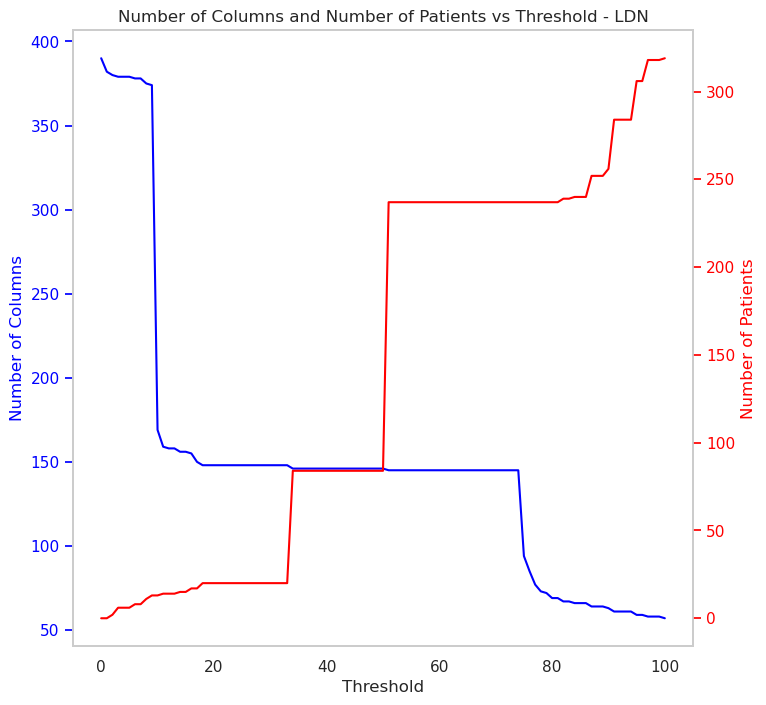

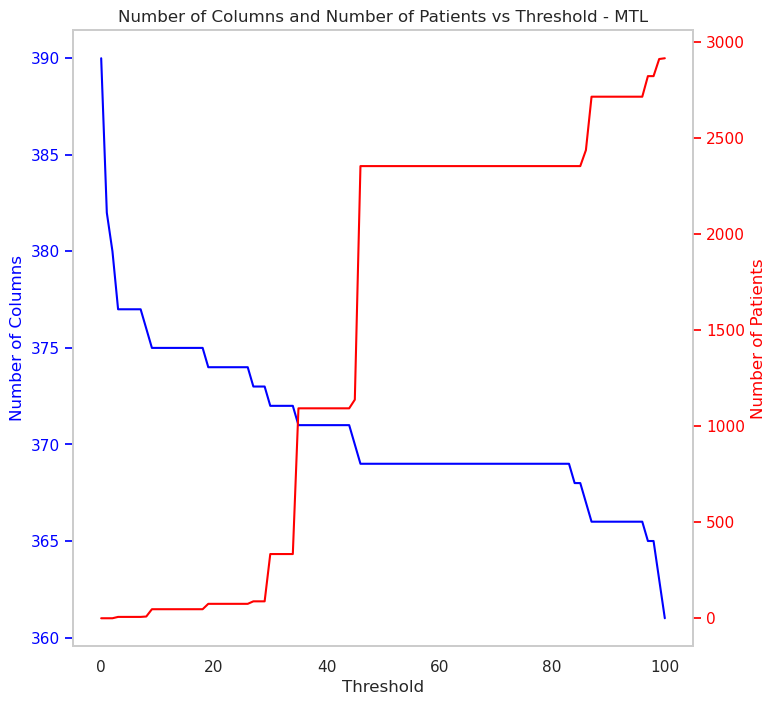

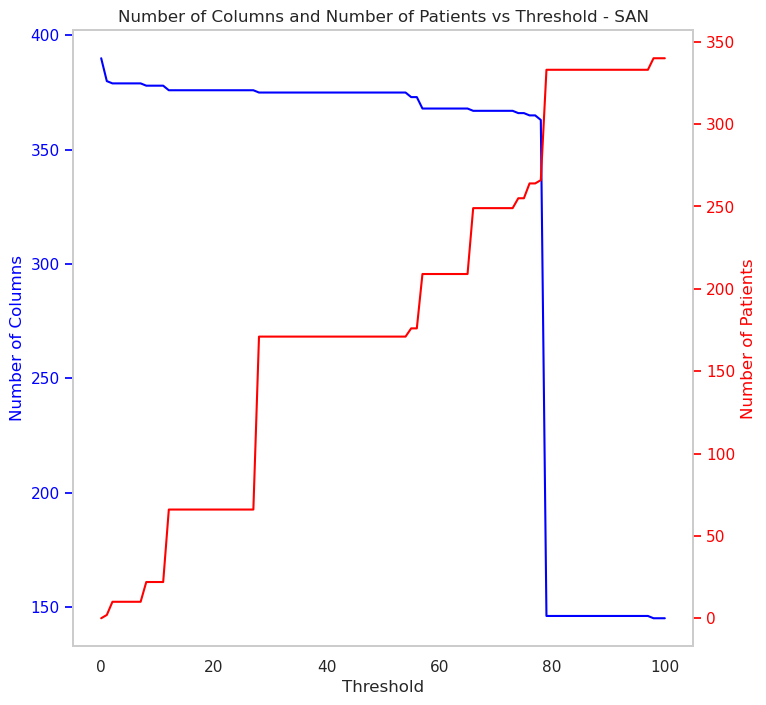

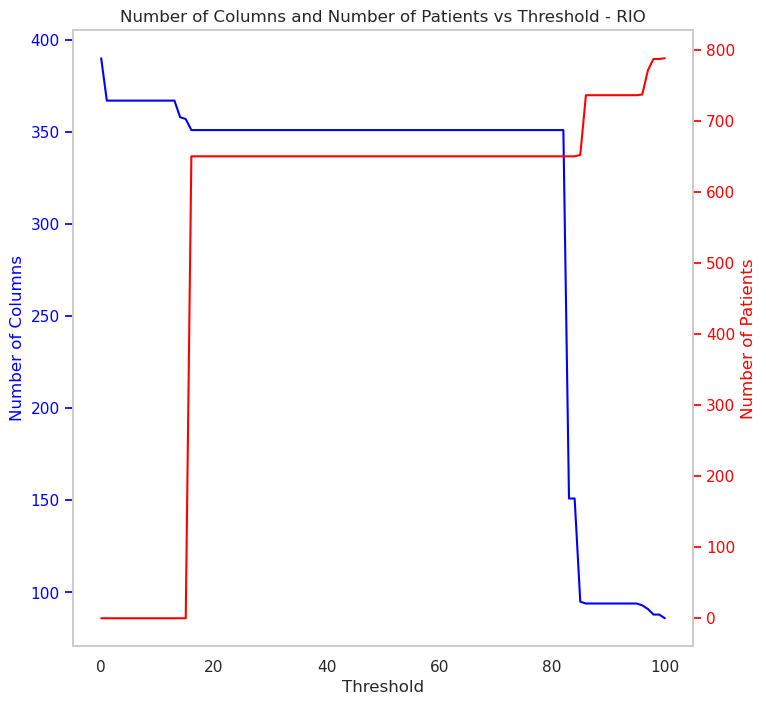

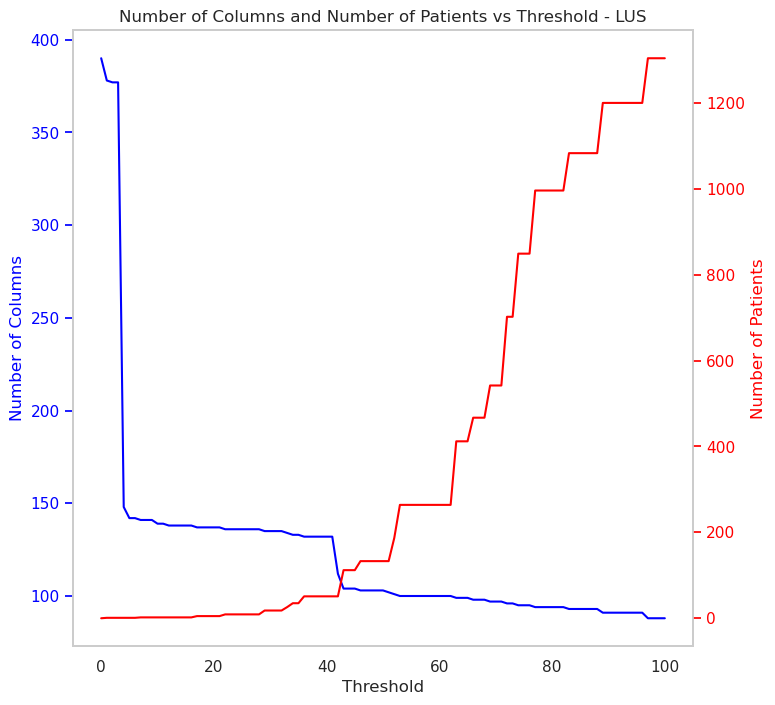

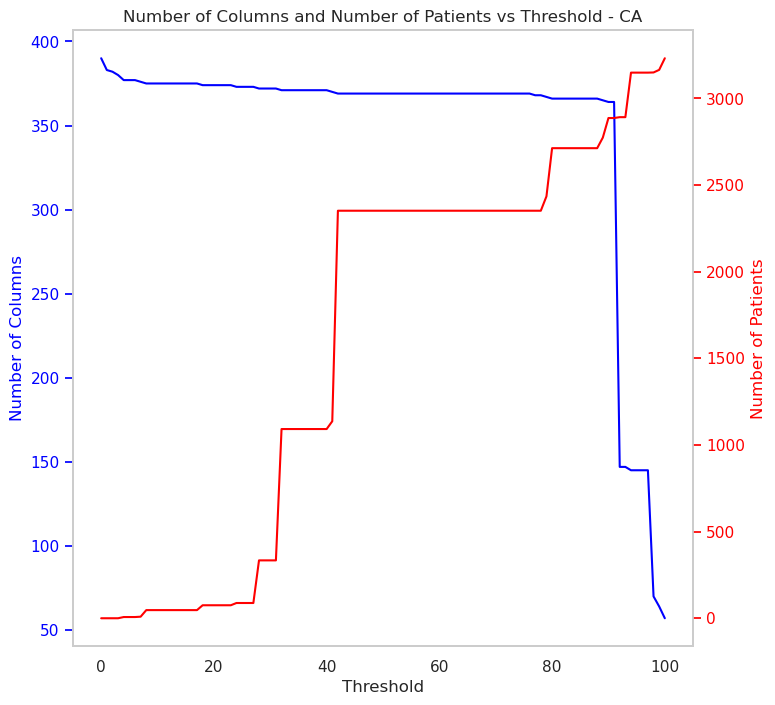

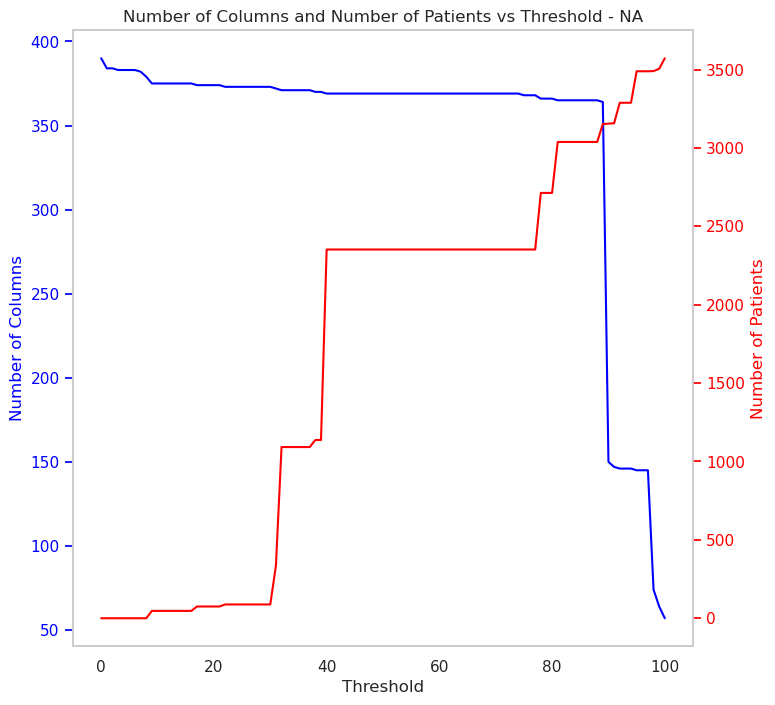

In [22]:
for i,siteFile in enumerate(lSitesThres):
    dfThres =pd.read_csv(siteFile)
    siteCode = site_name_dict[i+1]
        
    # Extract the data for plotting
    x = dfThres['threshold']
    y1 = dfThres['nCols']
    y2 = dfThres['nPatients']


    # Create the figure and axes
    fig, ax1 = plt.subplots()

    # Plot the first line plot
    ax1.plot(x, y1, color='blue')
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Number of Columns', color='blue')
    ax1.tick_params('y', colors='blue')

    # Create a second y-axis
    ax2 = ax1.twinx()

    # Plot the second line plot
    ax2.plot(x, y2, color='red')
    ax2.set_ylabel('Number of Patients', color='red')
    ax2.tick_params('y', colors='red')

    ax1.grid(False)
    ax2.grid(False)
    # Add a title and legend
    plt.title(f'Number of Columns and Number of Patients vs Threshold - {siteCode}')
    # plt.legend(['Number of Columns', 'Number of Patients'])

    # Display the plot
    plt.savefig(f'OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site{i+1}.png',dpi=600)
    plt.show()

### Inspect Thresholds and Export

In [23]:
lSitesThres = [
    "OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site1.csv",
    "OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site2.csv",
    "OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site3.csv",
    "OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site4.csv",
    "OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site5.csv",
    "OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site6.csv",
    "OUTPUT/MP/02-splicing/DataV2/2_1-thresholds_Site7.csv",
]


#### Lon

In [24]:
# import data, only incld threshold that had some change from previous threshold
dfT = pd.read_csv(lSitesThres[0]).dropna(
    subset=["colDropped"]
)

In [28]:
## -- RECOMMENDATION MP DONT USE--
# based on the following, Threshold 36% is recommended bc we we see the biggest jump in terms fo number of patients included
dfT[ (dfT['threshold']>30) & (dfT['threshold']<60)]
dfT

,threshold,nCols,nPatients,colDropped,cols,HC_Perc,LC_NEG_Perc,LC_POS_Perc,LDN,LC_POS,LC_NEG,HC
1,1,382,0,"CD-covid_test_result_4,CD-baby_covid,CD-spo2,C...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,380,2,"CD-covid_test_result_2,CD-required_oxygen","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,1.818182,0.626959,2.0,NaN,NaN
3,3,379,6,CD-postpartum,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,5.454545,1.880878,6.0,NaN,NaN
6,6,378,8,CD-pregnant,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,7.272727,2.507837,8.0,NaN,NaN
8,8,375,11,"CD-gcs,CD-oxygen,CD-avpu","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,10.000000,3.448276,11.0,NaN,NaN
9,9,374,13,CD-respiratory_rate,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,11.818182,4.075235,13.0,NaN,NaN
10,10,169,13,"CD-mood_change___1,CD-anxiety___2,CD-myocardia...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,11.818182,4.075235,13.0,NaN,NaN
11,11,159,14,"CD-copd___1,CD-respiratory_complications___1,C...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,12.727273,4.388715,14.0,NaN,NaN
12,12,158,14,CD-brain_fog___1,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,12.727273,4.388715,14.0,NaN,NaN
14,14,156,15,"CD-bmi,CD-height_m","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,13.636364,4.702194,15.0,NaN,NaN


In [ ]:
## -- RECOMMENDATION MP -- 
# based on the following, Threshold 81 is also a good choice because it allows us to retain a decent chunk of the patients (w drop in LUS patients)
# but keep some more columns than 85
dfTAll[ (dfTAll['threshold']==81) | (dfTAll['threshold']==85)]

,threshold,nCols,nPatients,colDropped,cols,HC_Perc,LC_NEG_Perc,LC_POS_Perc,LDN,LUS,MTL,RIO,SAN,LC_POS,LC_NEG,HC
81,81,111,4691,CD-mode_of_diag,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,75.586576,93.182844,74.294671,41.027607,100.0,84.517766,100.0,2064.0,2545.0,82.0
85,85,90,5396,SYMPT-shortness_of_breath_dyspne___2,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,94.475794,96.297968,74.294671,95.092025,100.0,84.517766,100.0,2133.0,3181.0,82.0


Export Selected Columns

In [ ]:
# s = dfTAll[dfTAll["threshold"] == 85]["colDropped"].iloc[0].split(",") + dfTAll[dfTAll["threshold"] == 84]["colDropped"].iloc[0].split(",")

# file_path = "OUTPUT/MP/02-splicing/DataV2/2_1_DV2_colsThresAll_DroppedFrom81to85.json"

# with open(file_path, "w") as json_file:
#     json.dump(s, json_file)

In [ ]:
# # Export Selected 85 Threshold Columns to File

# cols85 = dfTAll[dfTAll["threshold"] == 85]["cols"].iloc[0].split(",")
# file_path = "OUTPUT/MP/02-splicing/DataV2/2_1_DV2_colsThresAll_85.json"

# with open(file_path, "w") as json_file:
#     json.dump(cols85, json_file)

In [ ]:
# # Export Selected 84 Threshold Columns to File

# cols81 = dfTAll[dfTAll["threshold"] == 81]["cols"].iloc[0].split(",")
# file_path = "OUTPUT/MP/02-splicing/DataV2/2_1_DV2_colsThresAll_81.json"

# with open(file_path, "w") as json_file:
#     json.dump(cols81, json_file)

In [ ]:
# # Export dataFrame based on Threshold 84

# # using the arrow dataset format is way faster than excel
# # ~0.0s vs > 15s for the excel file

# import datasets

# # make a dataset
# print(df[cols85].shape)
# ds = datasets.arrow_dataset.Dataset.from_pandas(df[cols85].dropna(),preserve_index=False)
# ds.save_to_disk('../Data/DataV2/featuresThresAll85.arrow')

(5664, 90)


Saving the dataset (0/1 shards):   0%|          | 0/5396 [00:00<?, ? examples/s]

#### MTL

In [43]:
# selected 46 bc retains 80% particilants and lot of columns
# selected 97 bc retains vax
# selected 100 bc retains all patients

dfT = pd.read_csv(lSitesThres[1]).dropna(
    subset=["colDropped"]
)
dfT

,threshold,nCols,nPatients,colDropped,cols,LC_NEG_Perc,LC_POS_Perc,MTL,LC_POS,LC_NEG
1,1,382,0,"CD-hospitalized,CD-baby_covid,CD-oxygen,CD-req...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN
2,2,380,0,"CD-o2_saturation,CD-respiratory_rate","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN
3,3,377,7,"CD-heart_rate,CD-bp_systolic,CD-bp_diastolic","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",0.100150,0.545852,0.240302,5.0,2.0
8,8,376,9,CD-covid_test_result_4,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",0.150225,0.655022,0.308960,6.0,3.0
9,9,375,47,CD-fio2,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",1.001502,2.947598,1.613457,27.0,20.0
19,19,374,75,CD-covid_test_result_3,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",1.702554,4.475983,2.574665,41.0,34.0
27,27,373,88,CD-spo2,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",2.003005,5.240175,3.020941,48.0,40.0
30,30,372,334,CD-temperature,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",10.766149,12.991266,11.465843,119.0,215.0
35,35,371,1092,CD-covid_test_result_2,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",39.158738,33.842795,37.487127,310.0,782.0
45,45,370,1137,CD-postpartum,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",40.360541,36.135371,39.031926,331.0,806.0


In [44]:
lSelThresholds =[46,97,100]
siteNum = 2
for i in lSelThresholds:
    file_path = (
        f"OUTPUT/MP/02-splicing/DataV2/2_25_DV2_colsThres_Site{siteNum}_T{i}.json"
    )
    lC = dfT[dfT["threshold"] == i]["cols"].iloc[0].split(",")
    with open(file_path, "w") as json_file:
        json.dump(lC, json_file)
    # make a dataset
    print(dfSite[siteNum][lC].dropna().shape)
    ds = datasets.arrow_dataset.Dataset.from_pandas(dfSite[siteNum][lC].dropna(),preserve_index=False)
    ds.save_to_disk(f'../Data/DataV2/featuresSite{siteNum}_T{i}.arrow')

(2352, 369)


Saving the dataset (0/1 shards):   0%|          | 0/2352 [00:00<?, ? examples/s]

(2820, 365)


Saving the dataset (0/1 shards):   0%|          | 0/2820 [00:00<?, ? examples/s]

(2913, 361)


Saving the dataset (0/1 shards):   0%|          | 0/2913 [00:00<?, ? examples/s]

#### SAN

In [45]:
# selected 79 bc retains 98% particilants and VAX
# selected 100 bc retains all patients

dfT = pd.read_csv(lSitesThres[2]).dropna(
    subset=["colDropped"]
)
dfT

,threshold,nCols,nPatients,colDropped,cols,HC_Perc,LC_NEG_Perc,LC_POS_Perc,SAN,LC_POS,LC_NEG,HC
1,1,380,2,"CD-covid_test_result_4,CD-baby_covid,CD-spo2,C...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,0.751880,0.588235,2.0,NaN,NaN
2,2,379,10,CD-o2_saturation,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,3.759398,2.941176,10.0,NaN,NaN
8,8,378,22,CD-covid_test_result_3,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,8.270677,6.470588,22.0,NaN,NaN
12,12,376,66,"CD-pregnant,CD-postpartum","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,24.812030,19.411765,66.0,NaN,NaN
28,28,375,171,CD-covid_test_result_2,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,64.285714,50.294118,171.0,NaN,NaN
55,55,373,176,"CD-weight_kgs,CD-bmi","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,66.165414,51.764706,176.0,NaN,NaN
57,57,368,209,"CD-heart_rate,CD-respiratory_rate,CD-bp_diasto...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,78.571429,61.470588,209.0,NaN,NaN
66,66,367,249,CD-height_m,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,93.609023,73.235294,249.0,NaN,NaN
74,74,366,255,CD-required_oxygen,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,95.864662,75.000000,255.0,NaN,NaN
76,76,365,264,CD-hospitalized,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,99.248120,77.647059,264.0,NaN,NaN


In [46]:
lSelThresholds =[79,98]
siteNum = 3
for i in lSelThresholds:
    file_path = (
        f"OUTPUT/MP/02-splicing/DataV2/2_25_DV2_colsThres_Site{siteNum}_T{i}.json"
    )
    lC = dfT[dfT["threshold"] == i]["cols"].iloc[0].split(",")
    with open(file_path, "w") as json_file:
        json.dump(lC, json_file)
    # make a dataset
    print(dfSite[siteNum][lC].dropna().shape)
    ds = datasets.arrow_dataset.Dataset.from_pandas(dfSite[siteNum][lC].dropna(),preserve_index=False)
    ds.save_to_disk(f'../Data/DataV2/featuresSite{siteNum}_T{i}.arrow')

(333, 146)


Saving the dataset (0/1 shards):   0%|          | 0/333 [00:00<?, ? examples/s]

(340, 145)


Saving the dataset (0/1 shards):   0%|          | 0/340 [00:00<?, ? examples/s]

#### RIO

In [64]:
# selected 79 bc retains 98% particilants and VAX
# selected 100 bc retains all patients

dfT = pd.read_csv(lSitesThres[3]).dropna(
    subset=["colDropped"]
)
dfT

,threshold,nCols,nPatients,colDropped,cols,HC_Perc,LC_NEG_Perc,LC_POS_Perc,RIO,LC_POS,LC_NEG,HC
1,1,367,0,"CD-medication_received___1,CD-covid_test_resul...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,14,358,0,"CD-heart_rate,CD-ventilatory_support_type___4,...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,15,357,0,CD-adjunctive___1,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,16,351,650,"CD-hospitalized,CD-covid_test_result_1,CD-mode...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,99.84639,82.487310,650.0,NaN,NaN
83,83,151,650,"CD-mood_change___1,CD-anxiety___2,CD-myocardia...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,NaN,99.84639,82.487310,650.0,NaN,NaN
85,85,95,652,"SYMPT-ear_pain___1,SYMPT-muscle_aches_myalgia_...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,1.56250,99.84639,82.741117,650.0,2.0,NaN
86,86,94,736,HHX-Asthma,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,67.18750,99.84639,93.401015,650.0,86.0,NaN
96,96,93,737,CD-memory_problems___1,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,67.96875,99.84639,93.527919,650.0,87.0,NaN
97,97,91,771,"CD-deep_vein_thrombosis_dvt___1,HHX-Psychiatri...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,94.53125,99.84639,97.842640,650.0,121.0,NaN
98,98,88,787,"CD-myocarditis___1,CD-interstitial_lung_diseas...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",100.0,100.00000,99.84639,99.873096,650.0,128.0,9.0


In [66]:
lSelThresholds =[97,98]
siteNum = 4
for i in lSelThresholds:
    file_path = (
        f"OUTPUT/MP/02-splicing/DataV2/2_25_DV2_colsThres_Site{siteNum}_T{i}.json"
    )
    lC = dfT[dfT["threshold"] == i]["cols"].iloc[0].split(",")
    with open(file_path, "w") as json_file:
        json.dump(lC, json_file)
    # make a dataset
    print(dfSite[siteNum][lC].dropna().shape)
    ds = datasets.arrow_dataset.Dataset.from_pandas(dfSite[siteNum][lC].dropna(),preserve_index=False)
    ds.save_to_disk(f'../Data/DataV2/featuresSite{siteNum}_T{i}.arrow')

(771, 91)


Saving the dataset (0/1 shards):   0%|          | 0/771 [00:00<?, ? examples/s]

(787, 88)


Saving the dataset (0/1 shards):   0%|          | 0/787 [00:00<?, ? examples/s]

#### LUS

In [67]:
# selected 79 bc retains 98% particilants and VAX
# selected 100 bc retains all patients

dfT = pd.read_csv(lSitesThres[4]).dropna(
    subset=["colDropped"]
)
dfT

,threshold,nCols,nPatients,colDropped,cols,HC_Perc,LC_NEG_Perc,LC_POS_Perc,LUS,LC_NEG,LC_POS,HC
1,1,378,1,"CD-covid_test_result_4,CD-baby_covid,CD-spo2,C...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,0.100604,NaN,0.076687,1.0,NaN,NaN
2,2,377,1,CD-pregnant,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,0.100604,NaN,0.076687,1.0,NaN,NaN
4,4,148,1,"CD-mood_change___1,CD-anxiety___2,CD-myocardia...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,0.100604,NaN,0.076687,1.0,NaN,NaN
5,5,142,1,"CD-respiratory_complications___1,CD-hyperglyce...","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,0.100604,NaN,0.076687,1.0,NaN,NaN
7,7,141,2,CD-hospitalized,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,0.201207,NaN,0.153374,2.0,NaN,NaN
10,10,139,2,"CD-type_of_care___1,CD-medication_received___2","sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,0.201207,NaN,0.153374,2.0,NaN,NaN
12,12,138,2,CD-covid_test_result_2,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,0.201207,NaN,0.153374,2.0,NaN,NaN
17,17,137,5,HHX-HIV or AIDS,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,0.301811,0.735294,0.383436,3.0,2.0,NaN
22,22,136,9,CD-medication_received___6,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,0.503018,1.470588,0.690184,5.0,4.0,NaN
29,29,135,18,VAX-vaccinated,"sex,age,SITE,MED-Analgesics,MED-Anesthetics,ME...",NaN,0.905433,3.308824,1.380368,9.0,9.0,NaN


In [ ]:
lSelThresholds =[97,98]
siteNum = 5
for i in lSelThresholds:
    file_path = (
        f"OUTPUT/MP/02-splicing/DataV2/2_25_DV2_colsThres_Site{siteNum}_T{i}.json"
    )
    lC = dfT[dfT["threshold"] == i]["cols"].iloc[0].split(",")
    with open(file_path, "w") as json_file:
        json.dump(lC, json_file)
    # make a dataset
    print(dfSite[siteNum][lC].dropna().shape)
    ds = datasets.arrow_dataset.Dataset.from_pandas(dfSite[siteNum][lC].dropna(),preserve_index=False)
    ds.save_to_disk(f'../Data/DataV2/featuresSite{siteNum}_T{i}.arrow')

(266, 91)


Saving the dataset (0/1 shards):   0%|          | 0/266 [00:00<?, ? examples/s]

(333, 88)


Saving the dataset (0/1 shards):   0%|          | 0/333 [00:00<?, ? examples/s]

# 3- Splice Data based on David selected columns - Done

In [19]:
df

,sex,age,SITE,MED-Analgesics,MED-Anesthetics,MED-Antibacterials,MED-Anticonvulsants,MED-Antidepressants,MED-Antifungals,MED-Antimigraine-agents,...,CD-ventilatory_support_type___4,CD-ventricular_tachycardia_or___1,CD-ventricular_tachycardia_or___2,CD-ventricular_tachycardia_or___3,CD-ventricular_tachycardia_or___4,CD-weight_kgs,SUBST-1,SUBST-5,LC_STATUS,__index_level_0__
0,2.0,30.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,LC_POS,0
1,1.0,33.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,79.00,0.0,0.0,LC_POS,1
2,2.0,36.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,55.00,0.0,0.0,LC_POS,2
3,2.0,50.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,67.00,1.0,0.0,LC_POS,3
4,1.0,40.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,136.00,0.0,0.0,LC_POS,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,1.0,48.0,3,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,93.38,0.0,0.0,LC_POS,5659
5660,2.0,42.0,3,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,125.79,0.0,0.0,LC_POS,5660
5661,1.0,23.0,3,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,71.24,0.0,0.0,LC_POS,5661
5662,1.0,71.0,3,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,136.53,0.0,0.0,LC_POS,5662


In [20]:
with open('OUTPUT/MP/02-splicing/2_1_colsThresAll_83.txt','r') as file:
    data = file.readlines()
col83 = [x.strip() for x in data]

In [21]:
with open("OUTPUT/cluster_feature_ADDED.json", "r") as file:
    data = json.load(file)
colAdded = list(data)
print(colAdded)

['HHX-Asthma', 'HHX-Atrial fibrillation or flutter', 'HHX-COPD (emphysema', 'HHX-Chronic hematologic disease', 'HHX-Chronic neurological disorder (other than stroke/TIA)', 'HHX-Coronary artery disease', 'HHX-Dementia', 'HHX-Dialysis', 'HHX-HIV or AIDS', 'HHX-Heart failure', 'HHX-Malnutrition', 'HHX-Past tuberculosis infection', 'HHX-Prior myocardial infarction', 'HHX-Psychiatric disease', 'HHX-Pulmonary hypertension', 'HHX-Rheumatologic disease', 'HHX-Stroke', 'HHX-Transient ischemic attack (TIA)', 'SITE', 'SYMPT-abdominal_pain___2', 'SYMPT-chest_pain___2', 'SYMPT-confusion_altered_mental_s___2', 'SYMPT-cough___2', 'SYMPT-diarrhea___2', 'SYMPT-dizziness___2', 'SYMPT-ear_pain___1', 'SYMPT-ear_pain___2', 'SYMPT-extremity_weakness_or_numb___2', 'SYMPT-fatigue___2', 'SYMPT-fever_38_0oc___2', 'SYMPT-headache___2', 'SYMPT-hemoptysis_bloody_sputum___2', 'SYMPT-joint_pain_arthralgia___2', 'SYMPT-leg_swelling_edema___1', 'SYMPT-leg_swelling_edema___2', 'SYMPT-loss_of_appetite___2', 'SYMPT-loss_

In [22]:
with open("OUTPUT/cluster_feature_SUBTRACTED.json", "r") as file:
    data = json.load(file)
colSub = list(data)
print(colSub)

['LC_STATUS', 'MED-Analgesics', 'MED-Anesthetics', 'MED-Antibacterials', 'MED-Anticonvulsants', 'MED-Antidepressants', 'MED-Antifungals', 'MED-Antimigraine-agents', 'MED-Antiparasitics', 'MED-Antiparkinson-agents', 'MED-Antipsychotics', 'MED-Antispasticity-agents', 'MED-Antivirals', 'MED-Blood-glucose-regulators', 'MED-Blood-products', 'MED-Cardiovascular-agents', 'MED-Dermatological-agents', 'MED-Gastrointestinal-agents', 'MED-Hormonal-agents-(adrenal)', 'MED-Hormonal-agents-(sex-hormones)', 'MED-Hormonal-agents-(thyroid)', 'MED-Hormone-suppressant-(thyroid)', 'MED-Immunological-agents', 'MED-Inflammatory-bowel-disease-agents', 'MED-Metabolic-bone-disease-agents', 'MED-Ophthalmic-agents', 'MED-Respiratory-tract-agents', 'MED-Skeletal-muscle-relaxants', '__index_level_0__']


In [23]:
colsDT = col83 + colAdded
print(len(colsDT))
colsDT = list(set([x for x in colsDT if x not in colSub and x!='dag' and x!='SITE'])) #remove dag cause dag changed to SITE btwn DataV1 and DataV2
print(len(colsDT))
colsDT = ["LC_STATUS", "SITE", "__index_level_0__"]+colsDT #add identifiers
print(len(colsDT))

145
115
118


In [24]:
df

,sex,age,SITE,MED-Analgesics,MED-Anesthetics,MED-Antibacterials,MED-Anticonvulsants,MED-Antidepressants,MED-Antifungals,MED-Antimigraine-agents,...,CD-ventilatory_support_type___4,CD-ventricular_tachycardia_or___1,CD-ventricular_tachycardia_or___2,CD-ventricular_tachycardia_or___3,CD-ventricular_tachycardia_or___4,CD-weight_kgs,SUBST-1,SUBST-5,LC_STATUS,__index_level_0__
0,2.0,30.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,LC_POS,0
1,1.0,33.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,79.00,0.0,0.0,LC_POS,1
2,2.0,36.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,55.00,0.0,0.0,LC_POS,2
3,2.0,50.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,67.00,1.0,0.0,LC_POS,3
4,1.0,40.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,136.00,0.0,0.0,LC_POS,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,1.0,48.0,3,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,93.38,0.0,0.0,LC_POS,5659
5660,2.0,42.0,3,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,125.79,0.0,0.0,LC_POS,5660
5661,1.0,23.0,3,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,71.24,0.0,0.0,LC_POS,5661
5662,1.0,71.0,3,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,136.53,0.0,0.0,LC_POS,5662


In [25]:
dfDT = deepcopy(df[colsDT])

In [26]:
file_path = "OUTPUT/MP/02-splicing/DataV2/2_1_DV2_colsDT.json"

with open(file_path, "w") as json_file:
    json.dump(colsDT, json_file)

In [30]:
dfDT

,LC_STATUS,SITE,__index_level_0__,SYMPT-leg_swelling_edema___1,HHX-OTHER-fatigue,HHX-OTHER-surgery,HHX-OTHER-Anemia,HHX-OTHER-ulcerative-colitis,SYMPT-chest_pain___2,HHX-Cancer,...,HHX-OTHER-Derm,SYMPT-nausea_vomiting___2,SYMPT-seizure___2,HHX-Transient ischemic attack (TIA),HHX-Chronic hematologic disease,SYMPT-shortness_of_breath_dyspne___2,SYMPT-fatigue___1,SYMPT-fever_38_0oc___2,HHX-OTHER-IBS,HHX-OTHER-BPH
0,LC_POS,2,0,0.0,0,0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
1,LC_POS,2,1,0.0,0,0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
2,LC_POS,2,2,0.0,0,0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
3,LC_POS,2,3,0.0,0,0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
4,LC_POS,2,4,0.0,0,0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,LC_POS,3,5659,0.0,0,0,0,0,1.0,0.0,...,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
5660,LC_POS,3,5660,0.0,0,0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
5661,LC_POS,3,5661,0.0,0,0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
5662,LC_POS,3,5662,0.0,0,0,0,0,0.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0


In [29]:
# Export dataFrame based on Threshold 84

# using the arrow dataset format is way faster than excel
# ~0.0s vs > 15s for the excel file

import datasets

# make a dataset
print(dfDT.shape)
ds = datasets.arrow_dataset.Dataset.from_pandas(
    dfDT.dropna(), preserve_index=False
)
ds.save_to_disk("../Data/DataV2/featuresDT.arrow")

(5664, 118)


Saving the dataset (0/1 shards):   0%|          | 0/4000 [00:00<?, ? examples/s]